# K-Means Clustering für Diamanten

K-Means ist ein iterativer Clustering-Algorithmus, der Daten in eine vordefinierte Anzahl von **k** Clustern unterteilt, indem er die Punkte basierend auf der Nähe zu den Clusterzentroiden gruppiert. Ziel ist es, die Summe der quadratischen Abstände zwischen den Punkten und ihren Zentroiden zu minimieren.


In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px



In [2]:
# Daten laden und vorbereiten
# Daten laden
silent = True
%run ../dataLoadAndPrepare.ipynb

print("Features vor dem One-Hot-Encoding:")
display(df.head())  

diamonds = df.copy()

print("Für das Clustering werden alle numerischen Features verwendet")

# Features für das Clustering


Features vor dem One-Hot-Encoding:


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Für das Clustering werden alle numerischen Features verwendet


In [13]:
#Bestimmung der Anzahl der Cluster
# Elbow-Methode




# Vor k = 2 nimmt die Inertia sehr stark ab.
# Nach k = 3 wird die Reduktion kleiner, d. h., zusätzliche Cluster verbessern die Clustering-Qualität nicht mehr so stark.

C:\Users\hasse\AppData\Local\Temp\ipykernel_21328\3303809391.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cut', y='carat', data=diamonds, ax=ax2, palette='viridis')


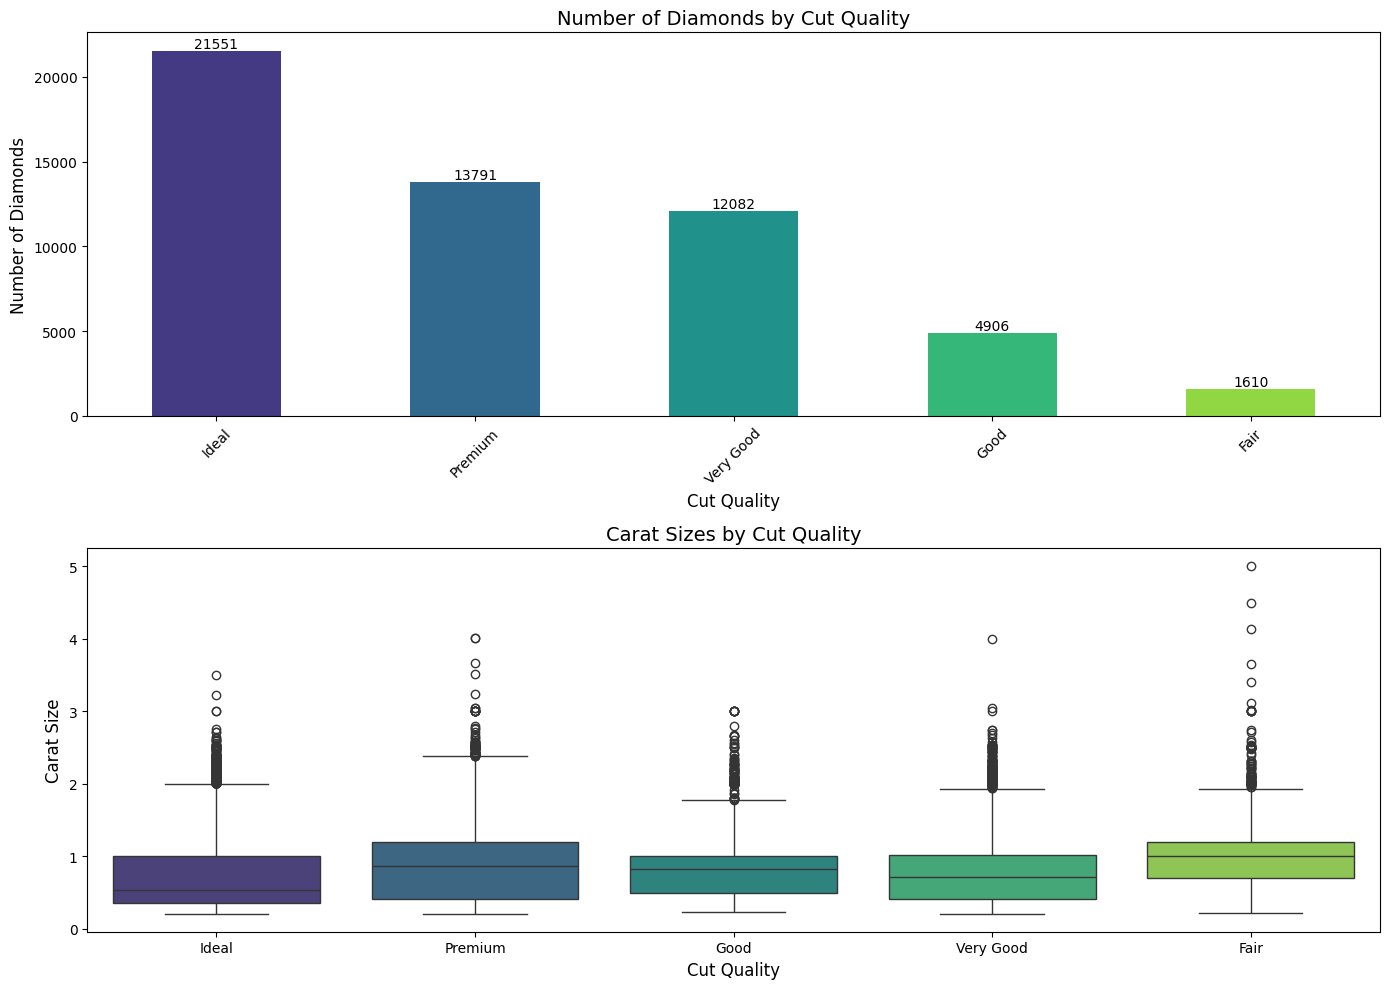


Detailed Cut and Carat Size Analysis:
           carat                                     price        
           count      mean median   min   max         mean  median
cut                                                               
Fair        1610  1.046137   1.00  0.22  5.01  4358.757764  3282.0
Good        4906  0.849185   0.82  0.23  3.01  3928.864452  3050.5
Ideal      21551  0.702837   0.54  0.20  3.50  3457.541970  1810.0
Premium    13791  0.891955   0.86  0.20  4.01  4584.257704  3185.0
Very Good  12082  0.806381   0.71  0.20  4.00  3981.759891  2648.0


In [3]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# First subplot: Count of diamonds by cut
cut_counts = diamonds['cut'].value_counts()
cut_counts.plot(kind='bar', ax=ax1, color=sns.color_palette("viridis", len(cut_counts)))
ax1.set_title('Number of Diamonds by Cut Quality', fontsize=14)
ax1.set_xlabel('Cut Quality', fontsize=12)
ax1.set_ylabel('Number of Diamonds', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(cut_counts):
    ax1.text(i, v, str(v), ha='center', va='bottom')

# Second subplot: Box plot of carat sizes by cut
sns.boxplot(x='cut', y='carat', data=diamonds, ax=ax2, palette='viridis')
ax2.set_title('Carat Sizes by Cut Quality', fontsize=14)
ax2.set_xlabel('Cut Quality', fontsize=12)
ax2.set_ylabel('Carat Size', fontsize=12)

plt.tight_layout()
plt.show()

# Detailed statistical summary
print("\nDetailed Cut and Carat Size Analysis:")
detailed_summary = diamonds.groupby('cut').agg({
    'carat': ['count', 'mean', 'median', 'min', 'max'],
    'price': ['mean', 'median']
})
print(detailed_summary)

Silhouette Score ranges from -1 to 1
A score around 0.37 indicates:

The clustering is moderately good
Clusters have some meaningful separation
There's room for improvement in the clustering algorithm or feature selection